<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

## *Data Science Unit 4 Sprint 4*

# Sprint Challenge
### RNNs, CNNs, GANS, and AutoML

In this Sprint Challenge, you'll explore some of the cutting edge of Data Science. *Caution* - these approaches can be pretty heavy computationally. All problems are designed to completed with 5-10 minutes of run time on most machines. If you approach takes longer, please double check your work. 

## Part 1 - RNNs

Use an RNN to fit a classification model on tweets to distinguish from tweets from any two accounts. The following code sample illustrates how to access data from an account (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper): 

In [1]:
!pip install twitterscraper

  Stored in directory: /home/william/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
  Stored in directory: /home/william/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built twitterscraper bs4
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen',10000)
lonzo_tweets = query_tweets('from:ZO2_',10000)
# len(austin_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-16', 'from:austen since:2006-11-16 until:2007-07-14', 'from:austen since:2007-07-14 until:2008-03-10', 'from:austen since:2008-03-10 until:2008-11-06', 'from:austen since:2008-11-06 until:2009-07-04', 'from:austen since:2009-07-04 until:2010-03-01', 'from:austen since:2010-03-01 until:2010-10-27', 'from:austen since:2010-10-27 until:2011-06-25', 'from:austen since:2011-06-25 until:2012-02-20', 'from:austen since:2012-02-20 until:2012-10-17', 'from:austen since:2012-10-17 until:2013-06-14', 'from:austen since:2013-06-14 until:2014-02-10', 'from:austen since:2014-02-10 until:2014-10-08', 'from:austen since:2014-10-08 until:2015-06-05', 'from:austen since:2015-06-05 until:2016-01-31', 'from:austen since:2016-01-31 until:2016-09-28', 'from:austen since:2016-09-28 until:2017-05-26', 'from:austen since:2017-05-26 until:2018-01-21', 'from:austen since:2018-01-21 until:2018-09-18', 'from:austen since:2018-09-18 until:2019-05-17']
INFO

INFO: Got 358 tweets (162 new).
INFO: Got 283 tweets for from%3AZO2_%20since%3A2012-10-17%20until%3A2013-06-14.
INFO: Got 641 tweets (283 new).
INFO: Got 286 tweets for from%3AZO2_%20since%3A2014-02-10%20until%3A2014-10-08.
INFO: Got 927 tweets (286 new).
INFO: Got 344 tweets for from%3AZO2_%20since%3A2014-10-08%20until%3A2015-06-05.
INFO: Got 1271 tweets (344 new).
INFO: Got 520 tweets for from%3AZO2_%20since%3A2013-06-14%20until%3A2014-02-10.
INFO: Got 1791 tweets (520 new).


In [13]:
len(austen_tweets)

1561

In [14]:
len(lonzo_tweets)

1791

In [6]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

Your Tasks:
* Select two twitter accounts to gather data from
* Use twitterscraper to get ~1,000 tweets from each account
* Encode the characters to a sequence of integers for the model
* Get the data into the appropriate shape/format, including labels and a train/test split
* Use Keras to fit a predictive model, classying tweets as being from one acount or the other
* Report your overall score and accuracy

For reference, the [Keras IMDB classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the RNN code we used in class.

Note - focus on getting a running model, not on making accuracy with extreme data size or epoch numbers. Fit a baseline model based on tweet text. Only revisit and push accuracy or incorporate additional features if you get everything else done!

In [24]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 


In [22]:
tweets = [tweet.text for tweet in austen_tweets]
tweets = tweets + [tweet.text for tweet in lonzo_tweets]
len(tweets)

3352

In [25]:
y = np.zeros(len(tweets))
y[:len(austen_tweets)] = 1 

In [26]:
all=''
for tweet in tweets:
  all= all+ tweet

chars = list(set(all)) # split and remove duplicate characters. convert to list.

num_chars = len(chars) # the number of unique characters
txt_data_size = len(tweets)

print("unique characters : ", num_chars)
print("txt_data_size : ", txt_data_size)


unique characters :  130
txt_data_size :  3352


In [27]:
char_to_int = dict((c, i) for i, c in enumerate(chars)) # "enumerate" retruns index and value. Convert it to dictionary
int_to_char = dict((i, c) for i, c in enumerate(chars))
print(char_to_int)
print("----------------------------------------------------")
print(int_to_char)
print("----------------------------------------------------")
# integer encode input data
X=[]
for tweet in tweets:
  integer_encoded = [char_to_int[i] for i in tweet] # "integer_encoded" is a list which has a sequence converted from an original data to integers.
  X.append(integer_encoded)
  
X = sequence.pad_sequences(X, maxlen=280)

{'Q': 0, 'L': 1, 'т': 2, 'c': 3, 'Д': 4, 'y': 5, 'b': 6, 'p': 7, 'f': 8, '5': 9, 'R': 10, '@': 11, 'l': 12, '#': 13, '~': 14, 'ч': 15, 'm': 16, 'B': 17, '&': 18, 'u': 19, 'N': 20, 'и': 21, 'а': 22, 'k': 23, 'с': 24, '?': 25, 'd': 26, 'e': 27, "'": 28, 'E': 29, 'A': 30, 'o': 31, 'я': 32, 'U': 33, 'у': 34, 'к': 35, 'ц': 36, 'G': 37, 'r': 38, 'j': 39, 'a': 40, '/': 41, '\n': 42, '9': 43, 'ñ': 44, 'T': 45, '4': 46, '!': 47, 'n': 48, 'H': 49, 'е': 50, '=': 51, 'S': 52, 'K': 53, '$': 54, 'в': 55, 'W': 56, '%': 57, 'V': 58, '>': 59, '+': 60, '*': 61, '\xa0': 62, '0': 63, '”': 64, ':': 65, ',': 66, 'J': 67, 'I': 68, '7': 69, 's': 70, 'i': 71, 'D': 72, 'о': 73, 'х': 74, 't': 75, 'К': 76, 'ж': 77, 'w': 78, 'г': 79, '’': 80, 'X': 81, 'Y': 82, 'h': 83, '8': 84, 'v': 85, '^': 86, '"': 87, '“': 88, '6': 89, ']': 90, '–': 91, '-': 92, 'q': 93, '.': 94, 'э': 95, 'O': 96, 'У': 97, 'д': 98, 'Г': 99, 'F': 100, 'М': 101, ';': 102, '…': 103, 'п': 104, 'Z': 105, '1': 106, ' ': 107, 'M': 108, 'н': 109, 'g': 

In [28]:
X_train , X_test, y_train, y_test=train_test_split(X,y, test_size=0.1)

In [29]:
print ('X train shape:', X_train.shape)
print ('X test shape:', X_test.shape)

X train shape: (3016, 280)
X test shape: (336, 280)


In [30]:
print('Build model...')
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
batch_size = 32
print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=25)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/25
3016/3016 [==============================] - 14s 5ms/step - loss: 0.3292 - acc: 0.8654
Epoch 2/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.3140 - acc: 0.8651
Epoch 3/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.3101 - acc: 0.8714
Epoch 4/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.2988 - acc: 0.8753
Epoch 5/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.3111 - acc: 0.8687
Epoch 6/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.2887 - acc: 0.8750
Epoch 7/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.2508 - acc: 0.8949
Epoch 8/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.2680 - acc: 0.8869
Epoch 9/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.2422 - acc: 0.9029
Epoch 10/25
3016/3016 [==============================] - 15s 5ms/step - loss: 0.2181 - acc: 0.9052
Epoch 11/2

## Part 2 - CNNs
Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [33]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 7.1MB/s eta 0:00:01
  Stored in directory: /home/william/.cache/pip/wheels/22/f3/7b/d1d7a18d9784458622ef3f9702c0bdbc179b431adde169c1a0
Successfully built google-images-download
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [70]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {'keywords': "animal pond", "limit": 7, "print_urls": True}
absolute_image_paths = response.download(arguments)



Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 3.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 4.PKLS4116_inline.png
Image URL: http://images.animalpicturesociety.com/images/5d/alligator_animal_on_pond.jpg
Completed Image ====> 5.alligator_animal_on_pond.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Completed Image ====> 6.frog-2243543_960_720.jpg
Image URL: h

At the time of writing at least a few do, but since the internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is validly run ResNet50 on the input images - don't worry about tuning or improving the model. 

*Hint:* ResNet 50 doesn't just return "frog". The three labels it has for frogs are bullfrog, tree frog, and tailed frog.

Stretch goal - also check for fish.

In [71]:
from PIL import Image, ImageOps
import imageio
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [72]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=7)[0]
  print(results)
  target =['bullfrog', 'tree frog', 'tailed frog']
  for entry in results:
    if entry[1] in target:
      return entry[2]
  return 0.0

In [73]:
for path in absolute_image_paths[0]['animal pond']:
  if img_contains_frog(process_img_path(path))>0:
    Image.open(path)

[('n03598930', 'jigsaw_puzzle', 0.8680318), ('n06359193', 'web_site', 0.06409997), ('n02834397', 'bib', 0.021264235), ('n06596364', 'comic_book', 0.015674599), ('n04404412', 'television', 0.005419704), ('n03291819', 'envelope', 0.0035499793), ('n03584254', 'iPod', 0.0034439552)]
[('n01443537', 'goldfish', 0.8495873), ('n01631663', 'eft', 0.06760184), ('n02536864', 'coho', 0.035163406), ('n01630670', 'common_newt', 0.01997371), ('n01980166', 'fiddler_crab', 0.007944569), ('n01985128', 'crayfish', 0.0053318343), ('n01978455', 'rock_crab', 0.0036934405)]
[('n02442845', 'mink', 0.30976564), ('n02363005', 'beaver', 0.23398934), ('n02361337', 'marmot', 0.2079684), ('n02441942', 'weasel', 0.091893025), ('n02443114', 'polecat', 0.073665656), ('n02444819', 'otter', 0.044672213), ('n07714990', 'broccoli', 0.016326748)]
[('n04243546', 'slot', 0.87124425), ('n04476259', 'tray', 0.049936175), ('n03908618', 'pencil_box', 0.0230725), ('n03291819', 'envelope', 0.008799049), ('n03485794', 'handkerchief

In [74]:
if img_contains_frog(process_img_path(absolute_image_paths[0]['animal pond'][5]))>0:
    Image.open(absolute_image_paths[0]['animal pond'][5])

[('n01641577', 'bullfrog', 0.9223303), ('n01644900', 'tailed_frog', 0.07364712), ('n01644373', 'tree_frog', 0.0011781206), ('n01978455', 'rock_crab', 0.00065272313), ('n01697457', 'African_crocodile', 0.0004659484), ('n01698640', 'American_alligator', 0.00021167629), ('n01601694', 'water_ouzel', 0.00014029561)]


In [75]:
img_contains_frog(process_img_path(absolute_image_paths[0]['animal pond'][5]))

[('n01641577', 'bullfrog', 0.9223303), ('n01644900', 'tailed_frog', 0.07364712), ('n01644373', 'tree_frog', 0.0011781206), ('n01978455', 'rock_crab', 0.00065272313), ('n01697457', 'African_crocodile', 0.0004659484), ('n01698640', 'American_alligator', 0.00021167629), ('n01601694', 'water_ouzel', 0.00014029561)]


0.9223303

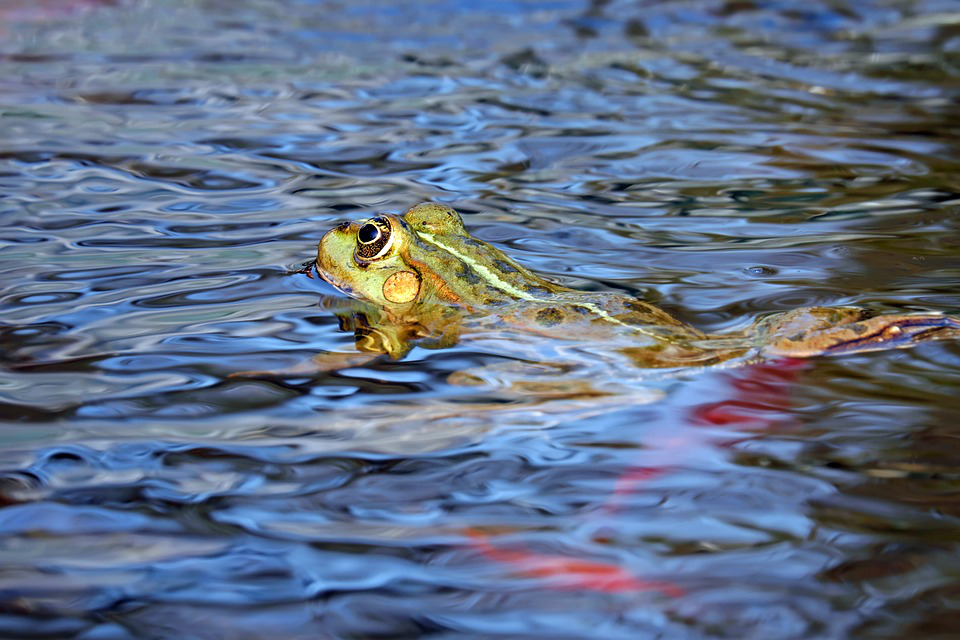

In [76]:
Image.open(absolute_image_paths[0]['animal pond'][5])

## Part 3 - AutoML

Use [TPOT](https://epistasislab.github.io/tpot/) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [77]:
!pip install tpot

    100% |████████████████████████████████| 81kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 942kB 8.5MB/s eta 0:00:01
  Stored in directory: /home/william/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
  Stored in directory: /home/william/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built stopit deap
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [80]:
from tpot import TPOTRegressor

In [78]:
import pandas as pd

url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
X = df.drop(['price','date','id'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(
    X, df['price'].values, train_size=0.75, test_size=0.25)

In [81]:
%%time

tpot = TPOTRegressor(generations=1, population_size=10, verbosity=2)
tpot.fit(X_train, y_train) 

Generation 1 - Current best internal CV score: -23822903122.479

Best pipeline: KNeighborsRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.3, min_samples_leaf=8, min_samples_split=15, n_estimators=100), n_neighbors=91, p=1, weights=distance)
CPU times: user 1min 7s, sys: 0 ns, total: 1min 7s
Wall time: 1min 8s


In [84]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred = tpot.predict(X_test)
rms = sqrt(mean_squared_error(y_pred, y_test))
print('Root Mean Square Error ($): ', rms)

Root Mean Square Error ($):  152968.97498699478


As with previous questions, your goal is to run TPOT and successfully run and report error at the end. Also, in the interest of time, feel free to choose small `generation=1`and `population_size=10` parameters, so your pipeline runs efficiently. You will want to be able to iterate and test. 

*Hint:* You will have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running - as long as you still get a valid model with reasonable predictive power. 

## Part 4 - More... 

Answer the following questions, with a target audience of a fellow Data Scientist:
* What do you consider your strongest area as a Data Scientist? 
* What area of Data Science would you most like to learn more about and why? 
* Where do you think Data Science will be in 5 years? 

A few sentences per answer is fine. Only elaborate if time allows. Use markdown to format your answers.

Thank you for your hard, and congratulations!! You've learned a lot, and you should proudly call yourself a Data Scientist. 

## What do you consider your strongest area as a Data Scientist?
I would say I consider my strongest area as a data scientist to be my ability to acquire domain knowledge in a short period of time to allow me to optimize my models for the complex problems I wish to solve. 

## What area  of Data Science would you most like to learn more about and why? 
I would like to learn more about NLP. I think the ability for machines to comprehend natural language, especially if there is a defined structure to the language, could be incredibly useful in fields pertaining to regulation, legislation, and legal writing. 

## Where do you think Data Science will be in 5 years?
I think data science will revolutionize industries that have been conducted by the standard of "The way it has always been done." Industries that build their services and models off of rough approximations, rules-of-thumb, and unchallenged concepts will be rebuilt around the capabilities of data science.